In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

c:\Users\79639\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\79639\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [2]:
import pandas as pd
df = pd.read_csv(fr'{path}\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

C:\Users\79639\AppData\Local\Temp\ipykernel_11640\2410541026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='coolwarm')


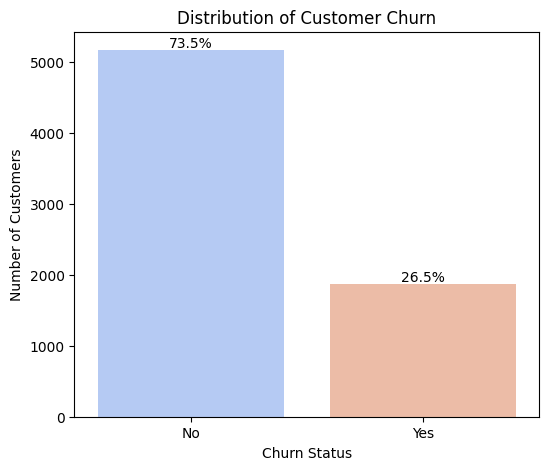

Observation: The dataset is imbalanced, with 'No' (non-churn) being the majority class.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize 'Churn' distribution
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
# Add percentages on bars
total = len(df['Churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()
print("Observation: The dataset is imbalanced, with 'No' (non-churn) being the majority class.")

C:\Users\79639\AppData\Local\Temp\ipykernel_11640\678568051.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr['TotalCharges'].fillna(0, inplace=True)


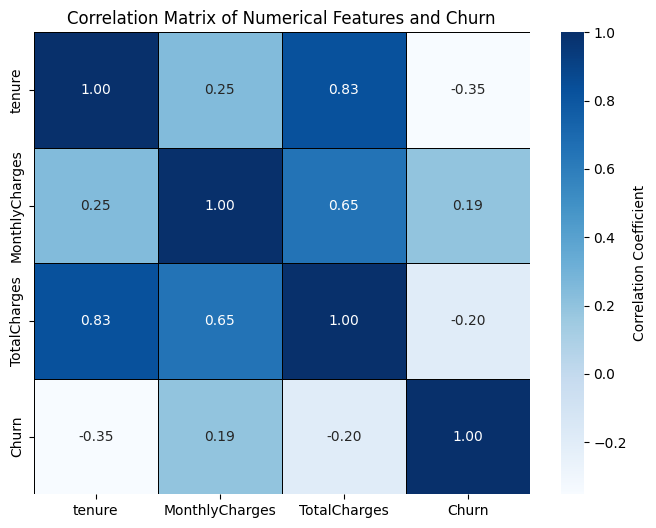

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid modifying the original
df_corr = df.copy()

# Convert 'Churn' to a numerical type (0 and 1)
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

#  Handle 'TotalCharges' column
# It's a string, so we need to replace empty values and convert to numeric
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
# Replace any NaN values that might have resulted from the conversion with 0
df_corr['TotalCharges'].fillna(0, inplace=True)

# Select the numerical features and the converted 'Churn' column
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
correlation_matrix = df_corr[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f",
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

--- Churn Rate by Contract Type ---
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


C:\Users\79639\AppData\Local\Temp\ipykernel_3452\4026286740.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette='viridis')


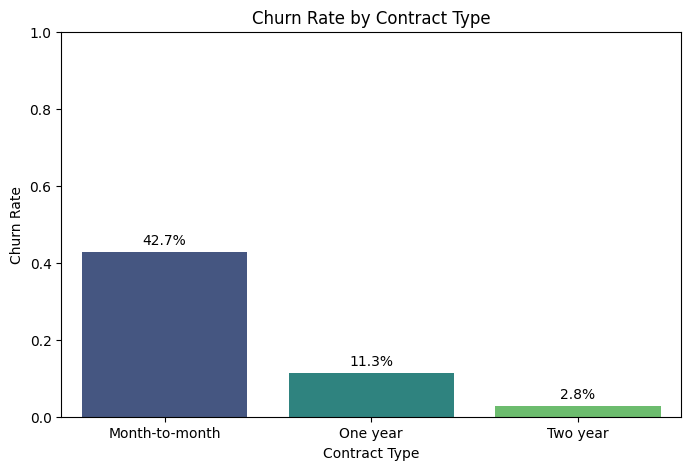


Observation: Customers with 'Month-to-month' contracts have a significantly higher churn rate compared to 'One year' or 'Two year' contracts. This is often because month-to-month contracts offer less commitment, making it easier for customers to leave.

--- Churn Rate by Internet Service Type ---
InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Churn, dtype: float64


C:\Users\79639\AppData\Local\Temp\ipykernel_3452\4026286740.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service.values, palette='magma')


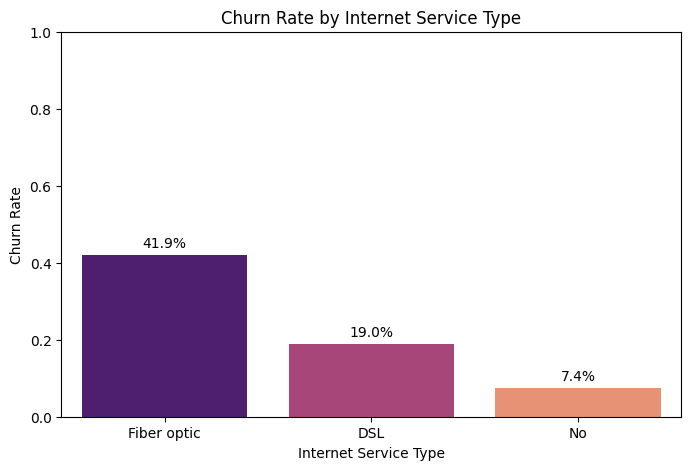


Observation: Customers with 'Fiber optic' internet service exhibit the highest churn rate. This could be due to factors like perceived unreliability, higher cost, or competitive alternatives in that service type.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Churn' column to numerical if it is still in 'Yes'/'No' format
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 1. Analyze Churn Rate by 'Contract'
print("--- Churn Rate by Contract Type ---")
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
print(churn_by_contract)

# Visualize Churn Rate by Contract
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract.values, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
# Add percentage labels on bars
for index, value in enumerate(churn_by_contract.values):
    plt.text(index, value + 0.02, f'{value:.1%}', ha='center')
plt.show()

print("\nObservation: Customers with 'Month-to-month' contracts have a significantly higher churn rate compared to 'One year' or 'Two year' contracts. This is often because month-to-month contracts offer less commitment, making it easier for customers to leave.")


# 2. Analyze Churn Rate by 'InternetService'
print("\n--- Churn Rate by Internet Service Type ---")
churn_by_internet_service = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)
print(churn_by_internet_service)

# Visualize Churn Rate by Internet Service
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service.values, palette='magma')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
# Add percentage labels on bars
for index, value in enumerate(churn_by_internet_service.values):
    plt.text(index, value + 0.02, f'{value:.1%}', ha='center')
plt.show()

print("\nObservation: Customers with 'Fiber optic' internet service exhibit the highest churn rate. This could be due to factors like perceived unreliability, higher cost, or competitive alternatives in that service type.")

3. Data Cleaning

In [ ]:
#Handle missing values (e.g., TotalCharges might have null values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
#Encode categorial features using one-hot encoding or label encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
categorial_features = df.select_dtypes(include=['object']).columns.tolist()
categorial_features.remove('Churn') # Exclude target variable
encoder = OneHotEncoder(sparse_output = False, drop = 'first') # Drop first to avoid dummy variable trap
encoded_features = encoder.fit_transform(df[categorial_features])
import numpy as np
# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorial_features))
# Combine the encoded features with the original DataFrame
df_encoded = pd.concat([df.drop(columns=categorial_features), encoded_df], axis=1)
# Normalize/Scale numerical features (important for KNN)
scaler = StandardScaler()
# Exclude non-numeric columns like 'customerID' from X
X = df.drop(columns=['Churn']).select_dtypes(include=['float64', 'int64']).values
y = df['Churn'].map({'No': 0, 'Yes': 1}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\79639\AppData\Local\Temp\ipykernel_11640\2871565287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
sklearn_knn_model = KNeighborsClassifier(n_neighbors=5)
sklearn_knn_model.fit(X_train_scaled, y_train)
y_pred_sklearn = sklearn_knn_model.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"\nAccuracy of scikit-learn KNN model: {accuracy_sklearn:.4f}")


Accuracy of scikit-learn KNN model: 0.7764
The accuracies should be identical if the logic is the same!
